# <center> Baseline Model


Baseline model will be created using the stats package. This will allow me to look at the p values for each feature and iteratively remove those that are statistically insignificant to the logistic regression classification model. 

In [1]:
# Importing the required packages

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# Loading the cleaned data
df_CVD = pd.read_csv('../src/data/Lifestyle_heart_data_clean.csv')

In [3]:
# Let's set a palette/diverge to create our visualisations with
custom_palette = ['#89CFF0','#d5014d']
custom_diverge = sns.diverging_palette(245, 5)

Prior to creation of the model, we need to check for collinearity between features. We can do so using a correlation heatmap.

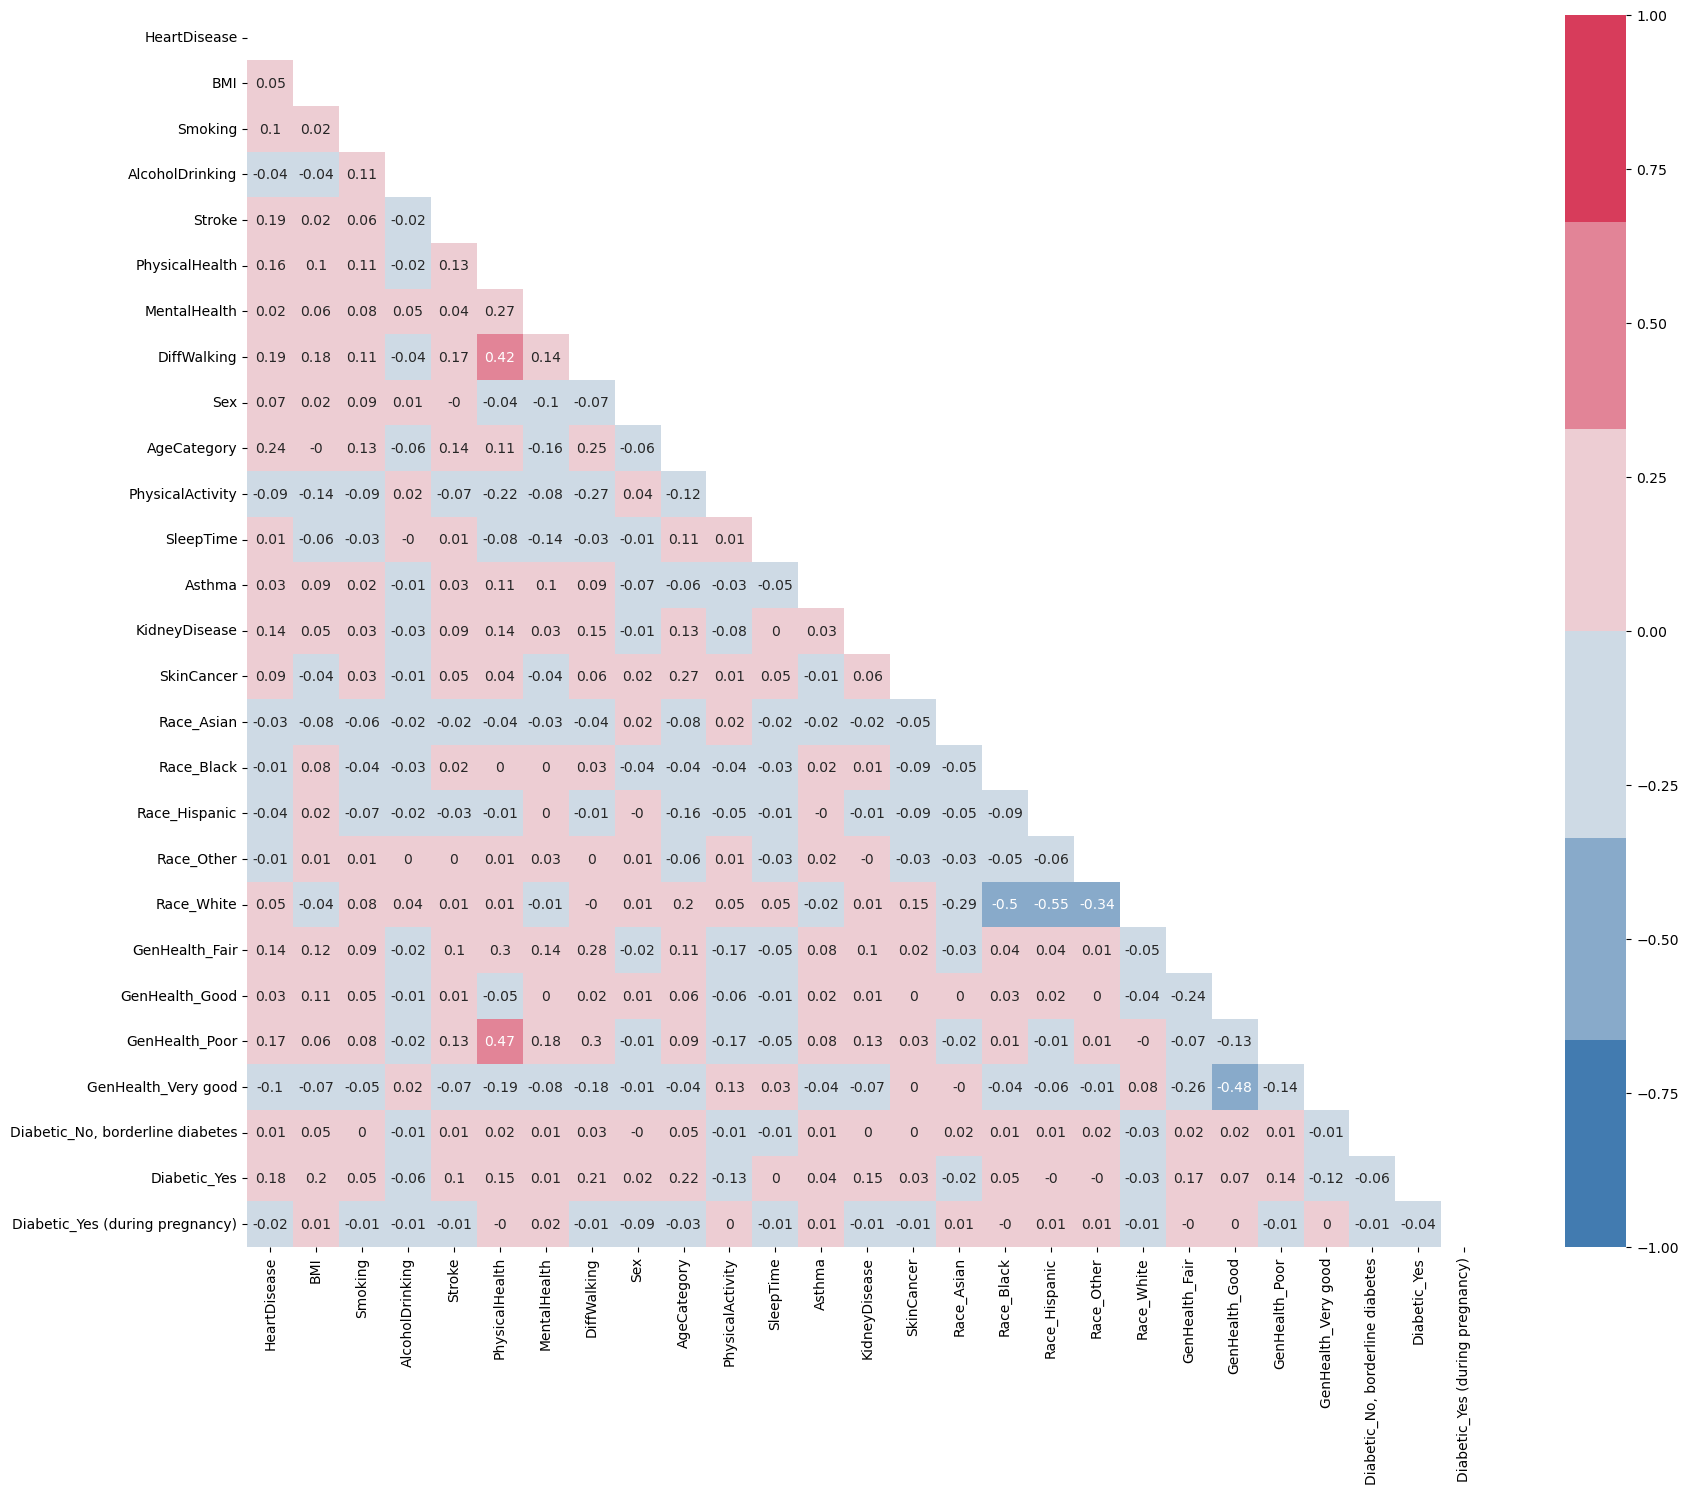

In [4]:
# Creation of the heatmap

mask = np.triu(df_CVD.corr()) # Removing half of the heatmap for readability.
plt.figure(figsize=(20, 16))
sns.heatmap(df_CVD.corr().round(2),annot = True, vmax=1, vmin=-1, center = 0, cmap = custom_diverge, mask=mask)
plt.show;

In general an absolute correlation coefficient > 0.7 indicates the presence of multicollinearity. None of our features have correlation coefficients larger than this threshold, although there is some correlation between the Race features. To be thorough we'll also perfom VIF. VIF is a more direct measure of multicollinearity as it is specifically designed to detect the increase in variance of the regression coefficients due to collinearity. It is also more reliable than a correlation heatmap as it takes into account the correlations between all independent variables, not just pairwise correlations. We'll set a VIF threshold of 5.

In [5]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assigning our dependent and independent variables
X = df_CVD.drop(columns=['HeartDisease'])
y = df_CVD['HeartDisease']

# Splitting our data
X_train, X_test , y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)


In [6]:
y_train.shape

(224534,)

In [7]:
# Adding a constant to our X_train
X_train_with_constant = sm.add_constant(X_train)

# Creating a VIF Series using a for loop to iterate over all features of X_train.
pd.Series([variance_inflation_factor(X_train_with_constant.values, i) 
               for i in range(X_train_with_constant.shape[1])], 
              index=X_train_with_constant.columns)[1:] 

BMI                                  1.129996
Smoking                              1.085435
AlcoholDrinking                      1.026721
Stroke                               1.058522
PhysicalHealth                       1.646478
MentalHealth                         1.190624
DiffWalking                          1.439096
Sex                                  1.051247
AgeCategory                          1.372819
PhysicalActivity                     1.141300
SleepTime                            1.039538
Asthma                               1.041692
KidneyDisease                        1.061185
SkinCancer                           1.096279
Race_Asian                           2.518279
Race_Black                           5.028479
Race_Hispanic                        5.760459
Race_Other                           3.016933
Race_White                          11.194696
GenHealth_Fair                       1.866620
GenHealth_Good                       1.945981
GenHealth_Poor                    

We can see that `Race_White` has a high degree of collinearity with the other independent variables. We can see that the `Race_Hispanic` also has a high degree of collinearity. Dropping one variable will change the VIFs for *all the independent variables*. As such, we cant drop all the features with VIF's >=5. 

Lets have a look at the VIF's after dropping `Race_White`

In [8]:
X_train = X_train.drop(columns='Race_White')
X_test = X_test.drop(columns='Race_White')
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

In [9]:
pd.Series([variance_inflation_factor(X_train_with_constant.values, i) 
               for i in range(X_train_with_constant.shape[1])], 
              index=X_train_with_constant.columns)[1:] 

BMI                                 1.129839
Smoking                             1.084679
AlcoholDrinking                     1.026598
Stroke                              1.058417
PhysicalHealth                      1.646459
MentalHealth                        1.190592
DiffWalking                         1.438929
Sex                                 1.051191
AgeCategory                         1.369751
PhysicalActivity                    1.141278
SleepTime                           1.039536
Asthma                              1.041691
KidneyDisease                       1.061184
SkinCancer                          1.095341
Race_Asian                          1.034440
Race_Black                          1.046828
Race_Hispanic                       1.074916
Race_Other                          1.019421
GenHealth_Fair                      1.866159
GenHealth_Good                      1.945715
GenHealth_Poor                      1.697457
GenHealth_Very good                 1.834253
Diabetic_N

All our features now show little to no correlation. We can now proceed with creating a baseline model. 

In [10]:
# Instantiating and fitting a logistic regression model
CVD_baseline_logit_v1 = sm.Logit(y_train, X_train_with_constant).fit()

# View stats
CVD_baseline_logit_v1.summary()

Optimization terminated successfully.
         Current function value: 0.236704
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               224534
Model:                          Logit   Df Residuals:                   224508
Method:                           MLE   Df Model:                           25
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2168
Time:                        01:47:40   Log-Likelihood:                -53148.
converged:                       True   LL-Null:                       -67863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -7.4995      0.084    -89.648      0.000      -7.663      -7.336
BMI                                  0.0076      0.001      5.789      0.000       0.005       0.010
Smoking                              0.3328      0.017     19.961      0.000       0.300       0.366
AlcoholDrinking                     -0.2398      0.038     -6.253      0.000      -0.315      -0.165
Stroke                               1.0110      0.026     38.353      0.000       0.959       1.063
PhysicalHealth                       0.0026      0.001      2.599      0.009       0.001       0.005
MentalHealth                         0.0045      0.001      4.354      0.000       0.002       0.006
DiffWalking                          0.2155      0.021     10.295      0.000       0.174       0.256
Sex                                  0.7140      0.017     42.174      0.000       0.681       0.747
AgeCategory                          0.0558      0.001     75.868      0.000       0.054       0.057
PhysicalActivity                     0.0388      0.019      2.089      0.037       0.002       0.075
SleepTime                           -0.0271      0.006     -4.781      0.000      -0.038      -0.016
Asthma                               0.2658      0.022     11.970      0.000       0.222       0.309
KidneyDisease                        0.5432      0.028     19.081      0.000       0.487       0.599
SkinCancer                           0.0933      0.022      4.155      0.000       0.049       0.137
Race_Asian                          -0.5736      0.080     -7.182      0.000      -0.730      -0.417
Race_Black                          -0.3025      0.034     -9.008      0.000      -0.368      -0.237
Race_Hispanic                       -0.2133      0.036     -5.938      0.000      -0.284      -0.143
Race_Other                          -0.0054      0.046     -0.118      0.906      -0.096       0.085
GenHealth_Fair                       1.4658      0.038     38.522      0.000       1.391       1.540
GenHealth_Good                       0.9899      0.034     28.837      0.000       0.923       1.057
GenHealth_Poor                       1.8458      0.048     38.728      0.000       1.752       1.939
GenHealth_Very good                  0.4541      0.035     12.849      0.000       0.385       0.523
Diabetic_No, borderline diabetes     0.0843      0.049      1.728      0.084      -0.011       0.180
Diabetic_Yes                         0.4598      0.019     23.759      0.000       0.422       0.498
Diabetic_Yes (during pregnancy)      0.0491      0.124      0.396      0.692      -0.194       0.292
====================================================================================================
"""

We note from the summary that two variables have high associated p-values. These variables are likely not predictive of the dependent variable. Lets exclude them from the model and see how it affects the remaining p-values. 

Removing too many variables in one go will affect the other p-values. We therefore, have to do this iteratively.

For now lets quickly generate an accuracy score by making predictions.

In [11]:
# Calculate soft predictions - soft = probability 
y_proba_train = CVD_baseline_logit_v1.predict(X_train_with_constant)
y_proba_test = CVD_baseline_logit_v1.predict(X_test_with_constant) 

# Convert to hard predictions - hard = yes or no in this case.
y_pred_train = np.where(y_proba_train >= 0.5, 1, 0)
y_pred_test = np.where(y_proba_test >= 0.5, 1, 0)
# Cross check them against the real y values
number_correct_pred_train = (y_pred_train == y_train).sum()
number_correct_pred_test = (y_pred_test == y_test).sum()
# Calculate as percentage.
prcnt_accur_train = number_correct_pred_train / X_train_with_constant.shape[0] *100
prcnt_accur_val = number_correct_pred_test / X_test_with_constant.shape[0] *100
print(f'Baseline Logistic Regression Model V1 Train Accuracy = {round(prcnt_accur_train, 1)}%')
print(f'Baseline Logistic Regression Model V1 Test Accuracy = {round(prcnt_accur_val, 1)}%')


Baseline Logistic Regression Model V1 Train Accuracy = 91.2%
Baseline Logistic Regression Model V1 Test Accuracy = 91.2%


Our baseline model has an accuracy of 91.2% and a test accuracy of 91.2%. Thats about as good as you can hope for in a baseline model. Let's continue! Diabetic_yes_(during pregnancy) has the highest p-value. This means this feature is not statistically significant in explaining the variance in our target variable. As such, we'll remove it and run the model again.

In [12]:
# Model V2:
# Updata X_train and X_val
X_train_v2 = X_train.drop(columns='Race_Other')
X_test_v2 = X_test.drop(columns='Race_Other')
X_train_with_constant_v2 = sm.add_constant(X_train_v2)
X_test_with_constant_v2 = sm.add_constant(X_test_v2)

CVD_baseline_logit_v2 = sm.Logit(y_train, X_train_with_constant_v2).fit()

# View stats
CVD_baseline_logit_v2.summary()


Optimization terminated successfully.
         Current function value: 0.236704
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               224534
Model:                          Logit   Df Residuals:                   224509
Method:                           MLE   Df Model:                           24
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2168
Time:                        01:47:42   Log-Likelihood:                -53148.
converged:                       True   LL-Null:                       -67863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -7.5002      0.083    -89.830      0.000      -7.664      -7.337
BMI                                  0.0076      0.001      5.789      0.000       0.005       0.010
Smoking                              0.3328      0.017     19.960      0.000       0.300       0.365
AlcoholDrinking                     -0.2398      0.038     -6.253      0.000      -0.315      -0.165
Stroke                               1.0110      0.026     38.353      0.000       0.959       1.063
PhysicalHealth                       0.0026      0.001      2.600      0.009       0.001       0.005
MentalHealth                         0.0045      0.001      4.353      0.000       0.002       0.006
DiffWalking                          0.2154      0.021     10.295      0.000       0.174       0.256
Sex                                  0.7140      0.017     42.174      0.000       0.681       0.747
AgeCategory                          0.0558      0.001     75.982      0.000       0.054       0.057
PhysicalActivity                     0.0388      0.019      2.088      0.037       0.002       0.075
SleepTime                           -0.0271      0.006     -4.780      0.000      -0.038      -0.016
Asthma                               0.2658      0.022     11.970      0.000       0.222       0.309
KidneyDisease                        0.5432      0.028     19.082      0.000       0.487       0.599
SkinCancer                           0.0934      0.022      4.161      0.000       0.049       0.137
Race_Asian                          -0.5734      0.080     -7.181      0.000      -0.730      -0.417
Race_Black                          -0.3022      0.034     -9.017      0.000      -0.368      -0.237
Race_Hispanic                       -0.2130      0.036     -5.941      0.000      -0.283      -0.143
GenHealth_Fair                       1.4658      0.038     38.522      0.000       1.391       1.540
GenHealth_Good                       0.9899      0.034     28.837      0.000       0.923       1.057
GenHealth_Poor                       1.8458      0.048     38.728      0.000       1.752       1.939
GenHealth_Very good                  0.4542      0.035     12.850      0.000       0.385       0.523
Diabetic_No, borderline diabetes     0.0841      0.049      1.726      0.084      -0.011       0.180
Diabetic_Yes                         0.4598      0.019     23.760      0.000       0.422       0.498
Diabetic_Yes (during pregnancy)      0.0490      0.124      0.395      0.693      -0.194       0.292
====================================================================================================
"""

In [13]:
# Accuracy Scores
y_proba_train = CVD_baseline_logit_v2.predict(X_train_with_constant_v2)
y_proba_test = CVD_baseline_logit_v2.predict(X_test_with_constant_v2) 

# Convert to hard predictions - hard = yes or no in this case.
y_pred_train = np.where(y_proba_train >= 0.5, 1, 0)
y_pred_test = np.where(y_proba_test >= 0.5, 1, 0)
# Cross check them against the real y values
number_correct_pred_train = (y_pred_train == y_train).sum()
number_correct_pred_test = (y_pred_test == y_test).sum()
# Calculate as percentage.
prcnt_accur_train = number_correct_pred_train / X_train_with_constant_v2.shape[0] *100
prcnt_accur_val = number_correct_pred_test / X_test_with_constant_v2.shape[0] *100
print(f'Baseline Logistic Regression Model V2 Train Accuracy = {round(prcnt_accur_train, 1)}%')
print(f'Baseline Logistic Regression Model V2 Test Accuracy = {round(prcnt_accur_val, 1)}%')

Baseline Logistic Regression Model V2 Train Accuracy = 91.2%
Baseline Logistic Regression Model V2 Test Accuracy = 91.2%


Model accuracy's have not changed, but we now have a p-value of ~0.7 for `Diabetic_Yes (during pregnancy)`. Lets continue the iterative approach and drop this column. 

In [14]:
# Model V3:
# Updata X_train and X_val
X_train_v3 = X_train_v2.drop(columns='Diabetic_Yes (during pregnancy)')
X_test_v3 = X_test_v2.drop(columns='Diabetic_Yes (during pregnancy)')
X_train_with_constant_v3 = sm.add_constant(X_train_v3)
X_test_with_constant_v3 = sm.add_constant(X_test_v3)

CVD_baseline_logit_v3 = sm.Logit(y_train, X_train_with_constant_v3).fit()

# View stats
CVD_baseline_logit_v3.summary()


Optimization terminated successfully.
         Current function value: 0.236704
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               224534
Model:                          Logit   Df Residuals:                   224510
Method:                           MLE   Df Model:                           23
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2168
Time:                        01:47:43   Log-Likelihood:                -53148.
converged:                       True   LL-Null:                       -67863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -7.4991      0.083    -89.865      0.000      -7.663      -7.336
BMI                                  0.0076      0.001      5.790      0.000       0.005       0.010
Smoking                              0.3328      0.017     19.960      0.000       0.300       0.365
AlcoholDrinking                     -0.2399      0.038     -6.254      0.000      -0.315      -0.165
Stroke                               1.0110      0.026     38.353      0.000       0.959       1.063
PhysicalHealth                       0.0026      0.001      2.598      0.009       0.001       0.005
MentalHealth                         0.0045      0.001      4.355      0.000       0.002       0.006
DiffWalking                          0.2154      0.021     10.294      0.000       0.174       0.256
Sex                                  0.7135      0.017     42.264      0.000       0.680       0.747
AgeCategory                          0.0558      0.001     76.002      0.000       0.054       0.057
PhysicalActivity                     0.0388      0.019      2.090      0.037       0.002       0.075
SleepTime                           -0.0271      0.006     -4.780      0.000      -0.038      -0.016
Asthma                               0.2658      0.022     11.971      0.000       0.222       0.309
KidneyDisease                        0.5432      0.028     19.082      0.000       0.487       0.599
SkinCancer                           0.0934      0.022      4.161      0.000       0.049       0.137
Race_Asian                          -0.5733      0.080     -7.179      0.000      -0.730      -0.417
Race_Black                          -0.3023      0.034     -9.019      0.000      -0.368      -0.237
Race_Hispanic                       -0.2130      0.036     -5.940      0.000      -0.283      -0.143
GenHealth_Fair                       1.4659      0.038     38.524      0.000       1.391       1.540
GenHealth_Good                       0.9900      0.034     28.839      0.000       0.923       1.057
GenHealth_Poor                       1.8458      0.048     38.729      0.000       1.752       1.939
GenHealth_Very good                  0.4542      0.035     12.851      0.000       0.385       0.523
Diabetic_No, borderline diabetes     0.0839      0.049      1.720      0.085      -0.012       0.179
Diabetic_Yes                         0.4595      0.019     23.763      0.000       0.422       0.497
====================================================================================================
"""

In [15]:
# Accuracy Scores
y_proba_train = CVD_baseline_logit_v3.predict(X_train_with_constant_v3)
y_proba_val = CVD_baseline_logit_v3.predict(X_test_with_constant_v3) 

# Convert to hard predictions - hard = yes or no in this case.
y_pred_train = np.where(y_proba_train >= 0.5, 1, 0)
y_pred_val = np.where(y_proba_val >= 0.5, 1, 0)
# Cross check them against the real y values
number_correct_pred_train = (y_pred_train == y_train).sum()
number_correct_pred_val = (y_pred_val == y_test).sum()
# Calculate as percentage.
prcnt_accur_train = number_correct_pred_train / X_train_with_constant_v3.shape[0] *100
prcnt_accur_val = number_correct_pred_val / X_test_with_constant_v3.shape[0] *100
print(f'Baseline Logistic Regression Model V3 Train Accuracy = {round(prcnt_accur_train, 1)}%')
print(f'Baseline Logistic Regression Model V3 Validation Accuracy = {round(prcnt_accur_val, 1)}%')

Baseline Logistic Regression Model V3 Train Accuracy = 91.2%
Baseline Logistic Regression Model V3 Validation Accuracy = 91.2%


Again our model performance has not changed, this is good! The the last feature with a p value > 0.05 is Diabetic_No, borderline diabetes. Im surprised by this as it looked like there was an increased proportion of heart disease in this population. Let's drop the column and hopefully this will be our last step before a final baseline model. 

In [16]:
# Model V4:
# Update X_train and X_val
X_train_v4 = X_train_v3.drop(columns='Diabetic_No, borderline diabetes')
X_test_v4 = X_test_v3.drop(columns='Diabetic_No, borderline diabetes')
X_train_with_constant_v4 = sm.add_constant(X_train_v4)
X_test_with_constant_v4 = sm.add_constant(X_test_v4)

CVD_baseline_logit_v4 = sm.Logit(y_train, X_train_with_constant_v4).fit()

# View stats
CVD_baseline_logit_v4.summary()

Optimization terminated successfully.
         Current function value: 0.236711
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               224534
Model:                          Logit   Df Residuals:                   224511
Method:                           MLE   Df Model:                           22
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2168
Time:                        01:47:45   Log-Likelihood:                -53150.
converged:                       True   LL-Null:                       -67863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.5036      0.083    -89.968      0.000      -7.667      -7.340
BMI                     0.0078      0.001      5.896      0.000       0.005       0.010
Smoking                 0.3328      0.017     19.957      0.000       0.300       0.365
AlcoholDrinking        -0.2403      0.038     -6.267      0.000      -0.315      -0.165
Stroke                  1.0112      0.026     38.360      0.000       0.960       1.063
PhysicalHealth          0.0026      0.001      2.595      0.009       0.001       0.005
MentalHealth            0.0045      0.001      4.372      0.000       0.002       0.007
DiffWalking             0.2155      0.021     10.295      0.000       0.174       0.256
Sex                     0.7139      0.017     42.286      0.000       0.681       0.747
AgeCategory             0.0558      0.001     76.139      0.000       0.054       0.057
PhysicalActivity        0.0389      0.019      2.094      0.036       0.002       0.075
SleepTime              -0.0272      0.006     -4.796      0.000      -0.038      -0.016
Asthma                  0.2663      0.022     11.996      0.000       0.223       0.310
KidneyDisease           0.5432      0.028     19.082      0.000       0.487       0.599
SkinCancer              0.0931      0.022      4.147      0.000       0.049       0.137
Race_Asian             -0.5699      0.080     -7.138      0.000      -0.726      -0.413
Race_Black             -0.3016      0.034     -8.999      0.000      -0.367      -0.236
Race_Hispanic          -0.2117      0.036     -5.907      0.000      -0.282      -0.141
GenHealth_Fair          1.4674      0.038     38.574      0.000       1.393       1.542
GenHealth_Good          0.9912      0.034     28.884      0.000       0.924       1.059
GenHealth_Poor          1.8474      0.048     38.769      0.000       1.754       1.941
GenHealth_Very good     0.4549      0.035     12.872      0.000       0.386       0.524
Diabetic_Yes            0.4554      0.019     23.738      0.000       0.418       0.493
=======================================================================================
"""

All p-values are <0.05 and therefore all features are statistically significant to the model. Lets extract our final the accuracies for train vs test data. 

In [17]:
# Accuracy Scores
y_proba_train = CVD_baseline_logit_v4.predict(X_train_with_constant_v4)
y_proba_test = CVD_baseline_logit_v4.predict(X_test_with_constant_v4) 

# Convert to yes or no predictions.
y_pred_train = np.where(y_proba_train >= 0.5, 1, 0)
y_pred_test = np.where(y_proba_test >= 0.5, 1, 0)

# Cross check them against the real y values
number_correct_pred_train = (y_pred_train == y_train).sum()
number_correct_pred_test = (y_pred_test == y_test).sum()

# Calculate as percentage.
prcnt_accur_train = number_correct_pred_train / X_train_with_constant_v4.shape[0] *100
prcnt_accur_test = number_correct_pred_test / X_test_with_constant.shape[0] *100
print(f'Baseline Logistic Regression Model V4 Train Accuracy = {round(prcnt_accur_train, 1)}%')
print(f'Baseline Logistic Regression Model V4 Test Accuracy = {round(prcnt_accur_test, 1)}%')

Baseline Logistic Regression Model V4 Train Accuracy = 91.2%
Baseline Logistic Regression Model V4 Test Accuracy = 91.2%


We have a model with an accuracy of 91.2%. Accuracy is defined by the number of classifications a model correctly predicts divided by the total number of predictions made.  On the surface, this looks fantastic, but if you remember we have a very imbalanced dataset! Only 9% of the cases in our dataset have a positive result for CVD. If we were to just predict no CVD every single time, we'd have an accuracy of 91%.

Some better metrics to measure a model performance are Recall and Precision. Time to pick apart the model...

In [18]:
# Importing recall and precision scoring metrics
from sklearn.metrics import recall_score, precision_score

# Printing the recall and precision scores on the test data
print(f'Precision Score for baseline model: {round(precision_score(y_test, y_pred_test)*100, 1)}%')
print(f'Recall Score for baseline model: {round(recall_score(y_test, y_pred_test)*100, 1)}%')

Precision Score for baseline model: 54.4%
Recall Score for baseline model: 10.7%


Precision measures the proportion of positive predictions that are actually true positives. In this case, a precision score of 54.4% means that out of all the instances the model predicted as positive, 54.4% of them were actually positive.

Recall measures the proportion of true positives that are actually true positives predicted by the model. In this case, a recall score of 10.7% means that out of all the positive instances in the dataset, only 10.7% of them were correctly identified.

Lets look at which features were the greatest predictors of CVD.

<Axes: >

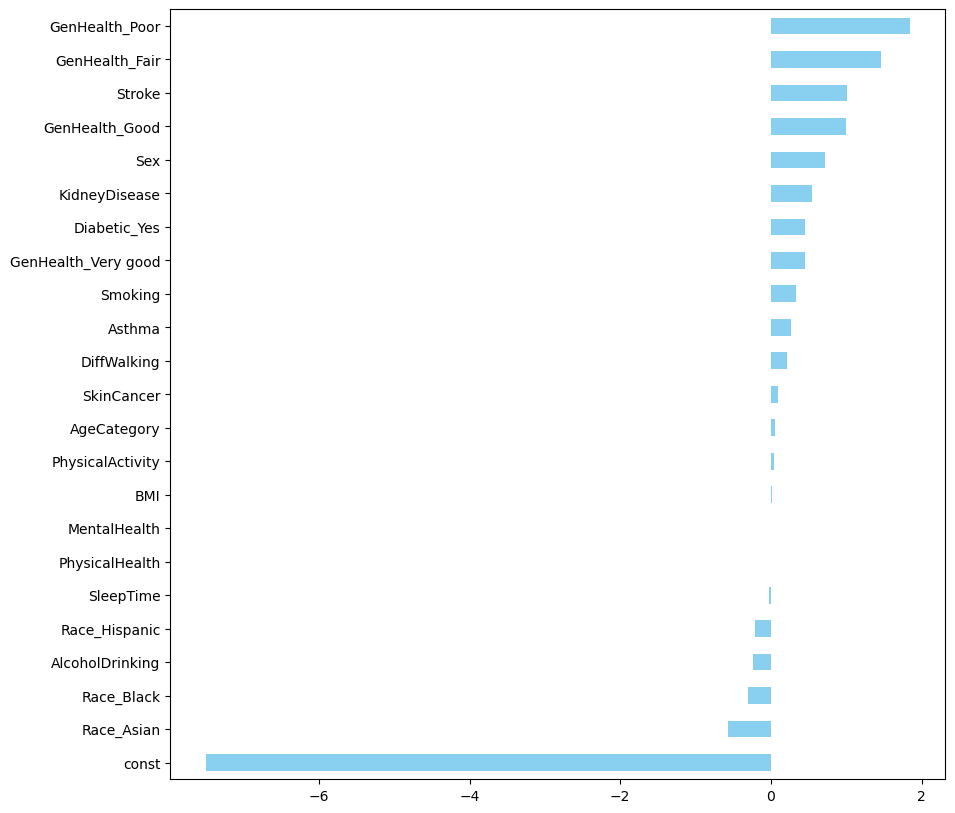

In [19]:
# Setting a figure size 
plt.figure(figsize = (10,10))

# plotting feature coefficients
CVD_baseline_logit_v4.params.sort_values().plot(kind = 'barh', color = custom_palette[0])

The outputs are initially confusing, this is because the data is not scaled. As such, features that you'd expect to be strong indicators of heart disease like age and BMI have a very small coefficient compared to the binary features.